## Regresión Lineal OLS con Variables Dummy

En muchos contextos, los modelos de regresión lineal no solo incluyen variables numéricas, sino también **variables categóricas**, como género, región, nivel educativo, etc. Para poder incluirlas en un modelo lineal, es necesario transformarlas en **variables dummy**.

Una variable dummy es una variable binaria (0 o 1) que indica la presencia o ausencia de una categoría específica.

Los modelos de regresión requieren que todos los predictores sean **numéricos**. Las variables categóricas, como `"genero"` o `"estado civil"`, deben transformarse para representar cada categoría como una o más columnas binarias.

Por ejemplo, si una variable `"genero"` tiene dos categorías: `"masculino"` y `"femenino"`, una codificación posible es:

- `genero_femenino = 1` si el individuo es mujer, `0` si es hombre (la categoría omitida actúa como referencia).

Esto permite al modelo estimar **diferencias de nivel en la variable respuesta** respecto a la categoría base.

En un modelo con variables dummy, cada coeficiente de una categoría representa el efecto adicional sobre la variable respuesta en comparación con la categoría base (la omitida).

Por ejemplo, si el coeficiente de $\beta_{\rm genero}$ para la variable Genero es 2000, entonces se interpreta como:

    "En promedio, las mujeres ganan 2000 unidades más que los hombres (categoría de referencia), manteniendo constantes las demás variables."

### Precaución

No se deben incluir manualmente todas las categorías como dummies sin omitir una, ya que se genera multicolinealidad perfecta (problema conocido como dummy variable trap).

La elección de la categoría de referencia afecta la interpretación de los coeficientes, pero no afecta el ajuste general del modelo.

## Importación de librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(42)

## Generación de datos ficticios

In [9]:
n_sample = 50
groups = np.zeros(n_sample, int) # generamos un array de puros 0's al que luego metemos 1's
groups[20:40] = 1
groups[40:] = 2
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

La función `pandas.get_dummies()` permite transformar variables categóricas en un conjunto de **variables dummy**.

Cada categoría se convierte en una nueva columna con valores 0 o 1, indicando la ausencia o presencia de esa categoría. Por defecto, `get_dummies()` crea una columna para cada categoría, aunque puede omitirse una con el parámetro `drop_first=True` para evitar colinealidad (trampa de las variables dummy).

Este método es especialmente útil cuando no se trabaja con fórmulas como en `statsmodels.formula.api`, sino directamente con matrices `X` e `y`.


In [10]:
dummy = pd.get_dummies(groups).values # el método values toma los valores y nos regresa un array
dummy

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [Fa

In [13]:
# Generamos las variables de entrada
x = np.linspace(0, 20, n_sample)
X = np.column_stack((x, dummy[:,1:])) # se ignora la primera columna de los dummies, para no tener este problema de dummy variable trap
# recordar entonces que la variable x1 es de referencia.
X = sm.add_constant(X, prepend=False)
X

array([[ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.40816327,  0.        ,  0.        ,  1.        ],
       [ 0.81632653,  0.        ,  0.        ,  1.        ],
       [ 1.2244898 ,  0.        ,  0.        ,  1.        ],
       [ 1.63265306,  0.        ,  0.        ,  1.        ],
       [ 2.04081633,  0.        ,  0.        ,  1.        ],
       [ 2.44897959,  0.        ,  0.        ,  1.        ],
       [ 2.85714286,  0.        ,  0.        ,  1.        ],
       [ 3.26530612,  0.        ,  0.        ,  1.        ],
       [ 3.67346939,  0.        ,  0.        ,  1.        ],
       [ 4.08163265,  0.        ,  0.        ,  1.        ],
       [ 4.48979592,  0.        ,  0.        ,  1.        ],
       [ 4.89795918,  0.        ,  0.        ,  1.        ],
       [ 5.30612245,  0.        ,  0.        ,  1.        ],
       [ 5.71428571,  0.        ,  0.        ,  1.        ],
       [ 6.12244898,  0.        ,  0.        ,  1.        ],
       [ 6.53061224,  0.

In [15]:
# Generamos la variable target con una recta + un ruido

beta = [1.0, 3.0, -3.0, 10]
e = np.random.normal(size=n_sample)
y_true = np.dot(X,beta) # valores de referencia sin error
y = y_true + e # valores con error

Como referencia, hacemos un print antes y después de quitar esta primera columna para las variables dummy.

In [16]:
dummy

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [Fa

In [18]:
dummy[:,1:] # se había ignorado la primera columna y ésta pasa a ser la referencia

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [Fal

## Modelo de regresión lineal ordinaria OLS

In [19]:
model = sm.OLS(y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     704.8
Date:                Thu, 29 May 2025   Prob (F-statistic):           1.93e-38
Time:                        00:42:02   Log-Likelihood:                -63.417
No. Observations:                  50   AIC:                             134.8
Df Residuals:                      46   BIC:                             142.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9827      0.058     16.810      0.000       0.865       1.100
x2             3.0755      0.555      5.540      0.000       1.958       4.193
x3            -2.9948      0.905     -3.311      0.002      -4.816      -1.174
const         10.1591      0.303     33.566      0.000       9.550      10.768
==============================================================================
Omnibus:                        5.000   Durbin-Watson:                   2.209
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                3.852
Skew:                          -0.585   Prob(JB):                        0.146
Kurtosis:                       3.692   Cond. No.                         96.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Hacemos una función para un plot de comparación como en casos anteriores
def plot_compare(res):

    prstd, iv_1, iv_u = wls_prediction_std(res)

    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(x, y, 'o', label='data')
    ax.plot(x, y_true, 'b-', label='True')
    ax.plot(x, res.fittedvalues, 'r--', label='OLS')
    ax.plot(x, iv_u, 'g--')
    ax.plot(x, iv_1, 'g--')
    ax.legend(loc='best')

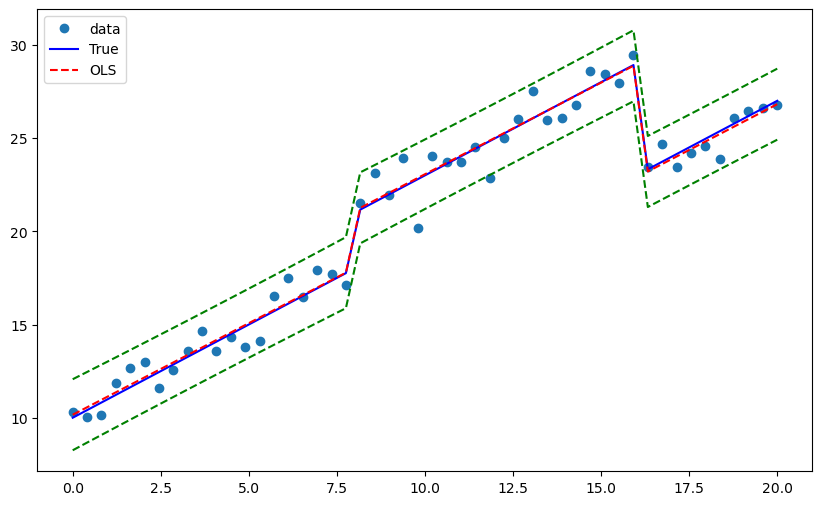

In [22]:
plot_compare(res)